# Load Dataset

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import datetime

# Visualization
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (15, 6)

from pandas_datareader import data as pdr
yf.pdr_override()

start = datetime.datetime(2000, 1, 1)
end = datetime.datetime(2020, 1, 1)

tickers = [
    'AAPL', 'AMGN', 'CSCO', 'CVX', 'DIS', 
    'HD', 'HON', 'IBM', 'INTC', 'JNJ', 'JPM', 
    'KO', 'MCD', 'MRK', 'MSFT', 'NKE', 'PG', 
    'UNH', 'VZ', 'WMT'
]

stocks = pdr.DataReader(tickers, start, end, interval='1mo')[['Adj Close', 'Volume']].dropna()
stocks = stocks[stocks.index >= datetime.datetime(1999, 12, 1)]
stocks.index = stocks.index.normalize() - pd.offsets.MonthBegin(1)
stocks

[*********************100%***********************]  21 of 21 completed


Adj Close                                                 \
                 AAPL        AMGN       CSCO         CVX         DIS   
Date                                                                   
2000-09-01   0.301350   46.188015  40.616169   17.161869   27.709255   
2000-10-01   0.254174   50.722115  36.092800   17.109627   22.389851   
2000-11-01   0.229142   50.971245  28.836544   17.921654   22.389851   
2000-12-01   0.333122   56.053402  28.224007   17.675987   23.722458   
2001-01-01   0.281132   57.448524  17.857929   18.181129   24.111988   
...               ...         ...        ...         ...         ...   
2019-07-01  51.388077  200.250015  44.914574  109.197838  136.442535   
2019-08-01  55.346920  187.062164  47.409294  111.145065  129.543869   
2019-09-01  61.472961  206.144440  45.586227  110.189186  129.146255   
2019-10-01  66.042168  226.899063  43.804592  109.767456  150.677261   
2019-11-01  72.783936  234.585938  46.366550  114.047806  143.768646   

                                                                       ...  \
                    HD         HON         IBM       INTC         JNJ  ...   
Date                                                                   ...   
2000-09-01   28.320396   32.101643   61.858974  28.301010   27.245110  ...   
2000-10-01   25.809406   29.081615   58.718925  23.937931   29.574070  ...   
2000-11-01   30.121481   28.327244   53.448788  18.914745   31.177166  ...   
2000-12-01   31.777987   28.289818   70.426605  23.279688   27.636211  ...   
2001-01-01   28.019997   27.978477   62.818020  17.970976   28.882572  ...   
...                ...         ...         ...        ...         ...  ...   
2019-07-01  219.898987  159.271469  125.791084  45.697998  123.179932  ...   
2019-08-01  223.864548  164.525070  136.560715  50.004570  125.089134  ...   
2019-09-01  227.046875  167.957550  125.582901  54.856560  127.660904  ...   
2019-10-01  214.058334  173.616745  126.259041  56.331562  132.930176  ...   
2019-11-01  211.990662  172.965118  127.360703  58.397919  142.009354  ...   

                 Volume                                                       \
                     KO          MCD          MRK          MSFT          NKE   
Date                                                                           
2000-09-01  180461800.0   84067000.0  143477900.0  2.469416e+09  181374400.0   
2000-10-01  188714400.0   74139700.0  146738900.0  1.983463e+09  135044000.0   
2000-11-01  193205000.0  102846600.0  118397100.0  2.056668e+09  242557600.0   
2000-12-01  174487800.0  120591700.0  145525200.0  2.005531e+09  307727200.0   
2001-01-01  178171600.0   93721300.0   98160000.0  1.536896e+09  310156800.0   
...                 ...          ...          ...           ...          ...   
2019-07-01  270094100.0   63742000.0  180223200.0  5.844743e+08  137950200.0   
2019-08-01  216515600.0   64087700.0  179567000.0  4.725448e+08  134314200.0   
2019-09-01  245853500.0   99548400.0  183698100.0  5.495234e+08  155233400.0   
2019-10-01  226001900.0   92605700.0  165050600.0  3.923718e+08  109098200.0   
2019-11-01  230590700.0   60538400.0  151362600.0  4.503033e+08  130170700.0   

                                                                            
                     PG         SNP          UNH           VZ          WMT  
Date                                                                        
2000-09-01  186260600.0  19603200.0  240513600.0  126516400.0  217333800.0  
2000-10-01  140411400.0   4995500.0  244269600.0  110433700.0  196379900.0  
2000-11-01  135825400.0   2543900.0  167978800.0  118892400.0  172787800.0  
2000-12-01  152735200.0   1980100.0  185183600.0  114836800.0  179925700.0  
2001-01-01  129571400.0   1956100.0  170886400.0  100378800.0  136950200.0  
...                 ...         ...          ...          ...          ...  
2019-07-01  163550400.0   3991900.0   76577600.0  277684500.0  157310800.0  
2019-08-01  1399903

In [4]:
stocks.shape

(231, 21)

# 1. Calculate monthly returns
Calculated using percent change from previous monthly price, given by $Ret=[P(t)/P(t-1)]-1$.

In [3]:
monthly_returns = stocks['Adj Close'].pct_change() * 100
monthly_returns

,AAPL,AMGN,CSCO,CVX,DIS,HD,HON,IBM,INTC,JNJ,JPM,KO,MCD,MRK,MSFT,NKE,PG,UNH,VZ,WMT
Date,,,,,,,,,,,,,,,,,,,,
1999-12-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-01,10.481932,7.065725,20.719161,-10.687610,-6.368336,1.545223,0.260444,-8.463197,14.213588,-16.339855,-0.758530,-15.342756,-15.050195,-21.701078,-8.684528,-37.500001,-12.810283,-3.537737,-20.478119,-10.958974
2000-02-01,18.484161,-9.990829,16.973966,25.877169,21.323539,12.173906,9.926697,15.328082,16.793872,-2.079040,9.497630,-3.470429,17.716575,0.913723,18.881159,39.340632,-35.419623,16.625910,24.904324,15.897541
2000-03-01,-8.651620,-8.757624,-10.327388,-7.910747,5.757594,-12.337992,6.287056,-5.807857,-3.884438,17.437737,-17.275960,1.423665,1.839445,12.400668,-34.352946,12.905997,5.286386,11.905121,-1.840533,-1.867867
2000-04-01,-32.292173,13.616062,-17.872431,8.590305,-3.295154,-13.274342,-2.343734,-3.755574,-1.675724,8.484809,4.092998,12.962936,-5.911281,7.374102,-10.304652,-1.294992,11.815666,11.808842,-11.334769,4.063256
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-07-01,-2.018402,11.812613,-14.972182,-4.378194,-3.426310,6.654484,-4.545984,-8.573944,-6.211669,-1.428355,-4.622602,4.579138,3.440572,4.193281,1.166799,-1.778453,2.514931,-6.027876,6.336507,3.515135
2019-08-01,7.703823,-6.585693,5.554367,1.783211,-5.056097,1.803356,3.298520,8.561521,9.423984,1.549930,7.127253,-1.090118,-0.974754,-2.648310,1.184512,11.435062,3.451720,-7.128203,3.782681,4.379646
2019-09-01,11.068437,10.201034,-3.845378,-0.860028,-0.306933,1.421541,2.086296,-8.038779,9.703093,2.055950,6.143253,0.712633,-8.388061,3.630225,3.121603,-4.652888,0.104524,16.828483,0.182227,0.353902


# 2. Get market risk premium and and risk free rate data

In [4]:
risk_data = pd.read_csv('F-F_Research_Data_Factors.CSV')
risk_data = risk_data.set_index('date')
risk_data

,Mkt-RF,SMB,HML,RF
date,,,,
192607,2.96,-2.30,-2.87,0.22
192608,2.64,-1.40,4.19,0.25
192609,0.36,-1.32,0.01,0.23
192610,-3.24,0.04,0.51,0.32
192611,2.53,-0.20,-0.35,0.31
...,...,...,...,...
202006,2.46,2.70,-2.22,0.01
202007,5.77,-2.18,-1.31,0.01
202008,7.63,-0.26,-2.95,0.01


Parse `date` column content to fit `datetime` format.

In [5]:
risk_data.index = pd.to_datetime(risk_data.index, format='%Y%m', errors='coerce')
risk_data

,Mkt-RF,SMB,HML,RF
date,,,,
1926-07-01,2.96,-2.30,-2.87,0.22
1926-08-01,2.64,-1.40,4.19,0.25
1926-09-01,0.36,-1.32,0.01,0.23
1926-10-01,-3.24,0.04,0.51,0.32
1926-11-01,2.53,-0.20,-0.35,0.31
...,...,...,...,...
2020-06-01,2.46,2.70,-2.22,0.01
2020-07-01,5.77,-2.18,-1.31,0.01
2020-08-01,7.63,-0.26,-2.95,0.01


Get data only from the most recent 20 years. Now, the dataset include only the years dates December 1999 to November 2019.

In [6]:
risk_data = risk_data[(risk_data.index >= datetime.datetime(1999, 12, 1)) & (risk_data.index.year <= 2019)]
risk_data.drop(risk_data.tail(1).index, inplace=True)
risk_data

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/pandas/core/frame.py:4162: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,Mkt-RF,SMB,HML,RF
date,,,,
1999-12-01,7.72,7.02,-8.39,0.44
2000-01-01,-4.74,5.62,-1.46,0.41
2000-02-01,2.45,21.13,-9.05,0.43
2000-03-01,5.20,-16.72,7.49,0.47
2000-04-01,-6.40,-7.04,7.68,0.46
...,...,...,...,...
2019-07-01,1.19,-2.06,0.30,0.19
2019-08-01,-2.58,-2.43,-4.93,0.16
2019-09-01,1.43,-0.99,6.78,0.18


# 3. Time Series Plots
Calculate the risk-free premium for each stock.

In [7]:
risk_tickers = ['AAPL', 'CSCO', 'IBM', 'MSFT', 'JPM']
risk_monthly_returns = monthly_returns[risk_tickers]
risk_monthly_returns

,AAPL,CSCO,IBM,MSFT,JPM
Date,,,,,
1999-12-01,NaN,NaN,NaN,NaN,NaN
2000-01-01,10.481932,20.719161,-8.463197,-8.684528,-0.758530
2000-02-01,18.484161,16.973966,15.328082,18.881159,9.497630
2000-03-01,-8.651620,-10.327388,-5.807857,-34.352946,-17.275960
2000-04-01,-32.292173,-17.872431,-3.755574,-10.304652,4.092998
...,...,...,...,...,...
2019-07-01,-2.018402,-14.972182,-8.573944,1.166799,-4.622602
2019-08-01,7.703823,5.554367,8.561521,1.184512,7.127253
2019-09-01,11.068437,-3.845378,-8.038779,3.121603,6.143253


In [8]:
risk_free = risk_monthly_returns.sub(risk_data['RF'], axis='rows')
risk_free

,AAPL,CSCO,IBM,MSFT,JPM
Date,,,,,
1999-12-01,NaN,NaN,NaN,NaN,NaN
2000-01-01,10.071932,20.309161,-8.873197,-9.094528,-1.168530
2000-02-01,18.054161,16.543966,14.898082,18.451159,9.067630
2000-03-01,-9.121620,-10.797388,-6.277857,-34.822946,-17.745960
2000-04-01,-32.752173,-18.332431,-4.215574,-10.764652,3.632998
...,...,...,...,...,...
2019-07-01,-2.208402,-15.162182,-8.763944,0.976799,-4.812602
2019-08-01,7.543823,5.394367,8.401521,1.024512,6.967253
2019-09-01,10.888437,-4.025378,-8.218779,2.941603,5.963253


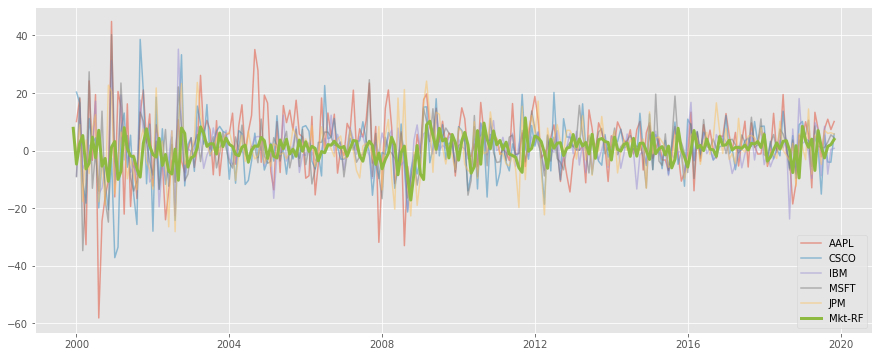

In [12]:
for col in risk_free.columns:
    plt.plot(risk_free[col], label=col, alpha=0.5)
    
plt.plot(risk_data['Mkt-RF'], label='Mkt-RF', lw=3)
plt.legend()

There does seem to be substantial correlation
within the co-movement of the 5 stocks and the
market risk premium.
# 4. Calculate CAPM Beta
$Returns = RF + \beta(Market-RF)$

In [10]:
rf = monthly_returns.sub(risk_data['RF'], axis='rows')
capm_beta = rf.div(risk_data['Mkt-RF'], axis='rows')
capm_beta

,AAPL,AMGN,CSCO,CVX,DIS,HD,HON,IBM,INTC,JNJ,JPM,KO,MCD,MRK,MSFT,NKE,PG,UNH,VZ,WMT
Date,,,,,,,,,,,,,,,,,,,,
1999-12-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-01,-2.124880,-1.404161,-4.284633,2.341268,1.430029,-0.239499,0.031552,1.871982,-2.912149,3.533725,0.246525,3.323366,3.261645,4.664784,1.918677,7.997890,2.789089,0.832856,4.406776,2.398518
2000-02-01,7.369045,-4.253400,6.752639,10.386599,8.527975,4.793431,3.876203,6.080850,6.679132,-1.024098,3.701073,-1.592012,7.055745,0.197438,7.531085,15.881891,-14.632499,6.610576,9.989520,6.313282
2000-03-01,-1.754158,-1.774543,-2.076421,-1.611682,1.016845,-2.463075,1.118665,-1.207280,-0.837392,3.263026,-3.412685,0.183397,0.263355,2.294359,-6.696720,2.391538,0.926228,2.199062,-0.444333,-0.449590
2000-04-01,5.117527,-2.055635,2.864442,-1.270360,0.586743,2.145991,0.438083,0.658683,0.333707,-1.253876,-0.567656,-1.953584,0.995513,-1.080328,1.681977,0.274218,-1.774323,-1.773257,1.842933,-0.563009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-07-01,-1.855800,9.766901,-12.741329,-3.838819,-3.038916,5.432340,-3.979819,-7.364659,-5.379554,-1.359963,-4.044203,3.688352,2.731573,3.364101,0.820839,-1.654162,1.953724,-5.225106,5.165132,2.794231
2019-08-01,-2.923962,2.614610,-2.090840,-0.629151,2.021743,-0.636960,-1.216481,-3.256404,-3.590691,-0.538733,-2.700486,0.484542,0.439827,1.088492,-0.397098,-4.370179,-1.275860,2.824885,-1.404140,-1.635522
2019-09-01,7.614292,7.007716,-2.814950,-0.727293,-0.340513,0.868211,1.333074,-5.747398,6.659505,1.311853,4.170107,0.372470,-5.991651,2.412745,2.057065,-3.379642,-0.052780,11.642296,0.001557,0.121610


# 5. CAPM Betas
For each stock, the betas seem to change
drastically on a monthly basis, rendering the
metric relatively useless. We believe that this
renders the CAPM useless (for measuring
recorded monthly returns) since there is no
discernable monthly beta pattern with any of our
20 stocks.